# Looking into NBA Player Stats (2023)

## Introduce the Problem/Goal

### I love basketball and watching any form of the game is always a pleasure to me. There's something special about cheering for your team while the opponent tries everything they can to stop them, and there are so many different niches and ways to make an impact on the court, so there's something for everyone who wants to start playing it. For example, some players' entire careers are built upon shooting the 3-pointer at an efficient rate, and some players have been known to be awful shooters, while still playing a crucial role in other areas like playmaking or defense. This is one of the reasons that I'm infatuated with basketball, and now that I have the opportunity to take a closer look into some data around it, I have a couple of things I want to find out. Because this project will be focusing on classification, I want to classify players based on a few different categories, like position, team, or even some nuanced metrics like +/- (how much more or less your team scores if you're playing). My goal in this project is to gain a little bit of insight about how NBA teams work, and learn about how they scheme their offense and defense around their star players. 

## Introduce the Data

### I found this dataset on Kaggle, and it includes basic statistics and relevant information about the player, like efficiency from all shots and 3's,position, as well as their total minutes logged and how many wins/losses their team had (in games that they played). This information will allow me to make conclusions about how valuable a player is, as well as find groups of players that fulfill certain thresholds of statistics. 

## Pre-processing

### This dataset is very nice for pre-processing because its data will allow me to filter in and out of certain categories very easily. As far as I know of, there aren't any null values in any features, and because of this, if I wanted to see which point guards were the most potent passers, I can easily filter my data to only show point guards, and iterate through the assist column to see who tallied the most. I could also do this with regard to total minutes, in order to find out which players had the most assists per minute played. This could provide even more insight to potential future stars that just aren't getting enough minutes right now.

## Data Understanding/Visualization

### I plan to use decision trees in my visualizations for this dataset. Originally, I was planning on using Naive Bayes, but when I was looking through the columns, I noticed that some features would be correlated with each other, which is problematic since Naive Bayes relies on independence between features. So, I decided to switch to decision trees, because their processes are similar, while decision trees are able to handle dependent data more reliably than Naive Bayes. 

In [18]:
%pip install nbconvert
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install scikit-learn






[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 35.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 54.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upg

### Firstly, I want to look a little into the +/- feature, which is a metric for how positively or negatively you impact your team when you enter the court. If a player's team scores more points than allowed while a player is playing in the game, that player's +/- is positive. Although this metric is very insightful for some of the league's more intricate scenarios with teams and team settings, it can also be blown out of proportion by a small sample size, take, for example, a bench player only playing in 1 game all season, and during that game their team scores 20 more points than the opposing team.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('../../Downloads/2023_nba_player_stats.csv')
df.columns

Index(['PName', 'POS', 'Team', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-'],
      dtype='object')

Mean Absolute Error: 108.18
R² Score: -0.29


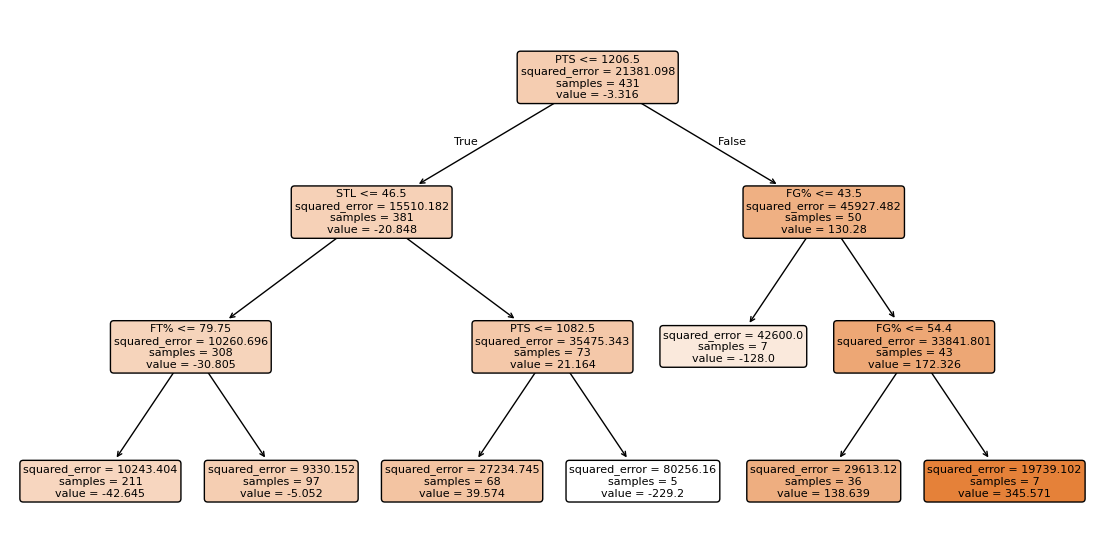

Accuracy: 0.56


In [40]:
features = ['PTS', 'AST', 'STL', 'BLK', 'FG%', 'REB', 'FT%']
target = '+/-'

df = df.dropna(subset=features + [target])

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_reg = DecisionTreeRegressor(max_depth=3, min_samples_split=10, min_samples_leaf=5, random_state=42)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(14, 7))
plot_tree(tree_reg, feature_names=features, filled=True, rounded=True, fontsize=8, max_depth=3)
plt.show()
print(f"Accuracy: {accuracy:.2f}")

### From this decision tree, we can make a couple of conclusions:

### Firstly, I would argue that points and field goal percentage are the 2 most valuable features to determine a player's value. Obviously defense, rebounding and playmaking are important, but players that can score in the NBA are the most sought after archetype. These are the players that get paid the big bucks. Next, efficiency is the 2nd most important factor, and this makes sense to me, because players that make the most of their opportunities are able to raise the level of their team while they play. 

### One thing I found surprising was that free throw percentage was a feature, however thinking about it, I was able to understand why. The final few minutes of a game are the most important, and ultimately determine the outcome when it's all said and done. A common tactic that is used by trailing teams during this time is to intentionally foul any poor free throw shooters on the other team, in order to get the ball back quicker and hopefully get a defensive possession where the other team doesn't score 2 points. So logically, a team that doesn't want to miss out on any points in the clutch would probably do their best to put players on the court that won't be taken advantage of when it matters most. Obviously, there are exceptions, like Giannis Antetokounmpo (67%), and Evan Mobley (68%), who are 15th and 16th in +/-. Although neither of these players shoot above even 70% at the line, both are elite defensive forwards who anchor their team's defense.

### Next, I'm going to look into the most important features that affect a team's record.

Accuracy: 0.56
              precision    recall  f1-score   support

        Loss       0.61      0.68      0.64        63
         Win       0.46      0.38      0.41        45

    accuracy                           0.56       108
   macro avg       0.53      0.53      0.53       108
weighted avg       0.54      0.56      0.55       108



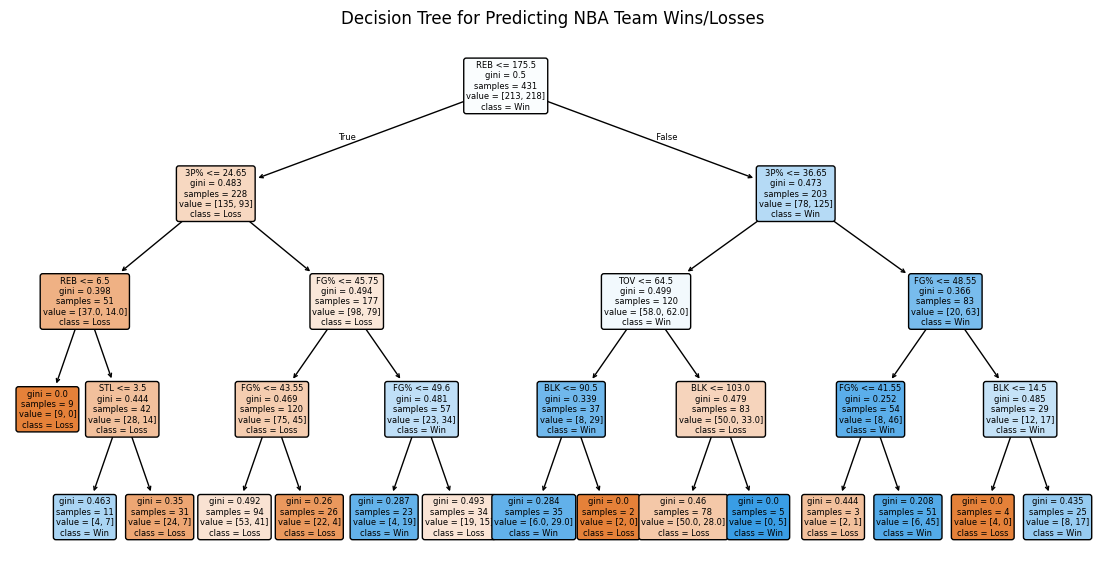

Accuracy: 0.56


In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (replace with your actual file path)
df = pd.read_csv('../../Downloads/2023_nba_player_stats.csv')

# Features and target selection
features = ['FG%', '3P%', 'REB', 'AST', 'STL', 'BLK', 'TOV']

# Correctly defining the target variable (1 = Win, 0 = Loss)
df['W/L'] = (df['W'] > df['L']).astype(int)  # 1 if more Wins, 0 otherwise

target = 'W/L'  # Define target column name

# Drop rows with missing values
df = df.dropna(subset=features + [target])

# Split data into features (X) and target (y)
X = df[features]
y = df[target]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)  # Limit depth for interpretability
tree_clf.fit(X_train, y_train)

# Predictions
y_pred = tree_clf.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=['Loss', 'Win']))

# Visualizing Decision Tree
plt.figure(figsize=(14, 7))
plot_tree(tree_clf, feature_names=features, class_names=['Loss', 'Win'], filled=True, rounded=True, fontsize=6)
plt.title("Decision Tree for Predicting NBA Team Wins/Losses")
plt.show()
print(f"Accuracy: {accuracy:.2f}")

### This visualization was very surprising on first glance. The first category we split our classification on is rebounding, which makes sense historically. The best big men in the earliest forms of the game were able to dominate simply because of their height. If a team is true on that category, the next feature is 3-point percentage, which is basically saying that a team that succeeds must be able to balance out their interior strength with the spacing needed to support that type of game plan. 

### On the other side of the branches, 3-point percentage is also the first feature of importance. When you think about how the game has evolved over time, teams in the NBA have started hunting for 3-pointers, with teams like the Golden State Warriors and players like Steph Curry realizing that, incredibly, 3 points is more than 2 points! On a more serious note, shooting 2-pointers at 50% is less valuable than shooting 3-pointers at 50%. So, if a team isn't able to control the paint consistently, they must make up for it with excellent shooting from beyond the arc in order to be successful. Moving down, turnovers are the next most important. This makes sense, because less turnovers means more possessions on offense and more chances to score. 


## Evaluation

### My models, admittedly, aren't very accurate, with each having a score of .56. I think that this is understandable though, when you consider how different teams and their makeup are when looking across the league. Another thing to think about is that bad teams aren't often very good at anything in particular. Turnovers and poor field goal percentage are 2 common trends on the worst teams, year by year.

## Impact

### I think that this project was very insightful, even though my models weren't too reliable. If you couldn't tell, I'm infatuated by basketball, and being able to learn more about the sport at its highest level is something I can always appreciate. However, more than that, I think that the unreliability of any model goes to show just how far the sport has come since its inception, and just how wide open the league is in terms of talent and ability. Another thing I noticed was that offensive factors showed up more than any other, and I think that this also reflects the state of the game. As the game has progressed, people have had more access to the game and knowledge about training. Offense is the most fun part of basketball, and pure offense will always get you further than any other single attribute. 